In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset = pd.read_csv("amazon_alexa.tsv",sep="\t")

In [ ]:
dataset

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
len(dataset[dataset["feedback"]==1])

2893

In [ ]:
len(dataset[dataset["feedback"]==0])

257

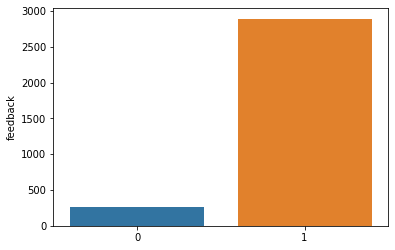

In [ ]:
x = dataset.feedback.value_counts()
sns.barplot(x.index,x)

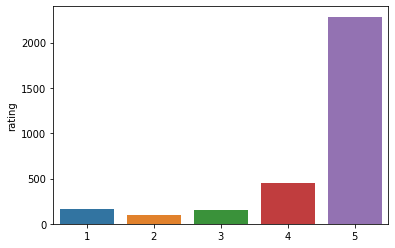

In [ ]:
x = dataset.rating.value_counts()
sns.barplot(x.index,x)

(array([2.782e+03, 2.660e+02, 7.200e+01, 1.800e+01, 6.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.000e+00, 2.860e+02, 5.710e+02, 8.560e+02, 1.141e+03, 1.426e+03,
        1.711e+03, 1.996e+03, 2.281e+03, 2.566e+03, 2.851e+03]),
 <a list of 10 Patch objects>)

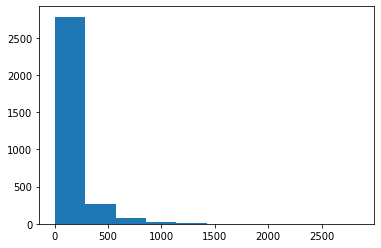

In [ ]:
word_len = dataset["verified_reviews"].str.len()
plt.hist(word_len,bins=10)

In [ ]:
dataset.describe()

,rating,feedback
count,3150.00,3150.00
mean,4.46,0.92
std,1.07,0.27
min,1.00,0.00
25%,4.00,1.00
50%,5.00,1.00
75%,5.00,1.00
max,5.00,1.00


In [ ]:
stopwords = set(STOPWORDS)

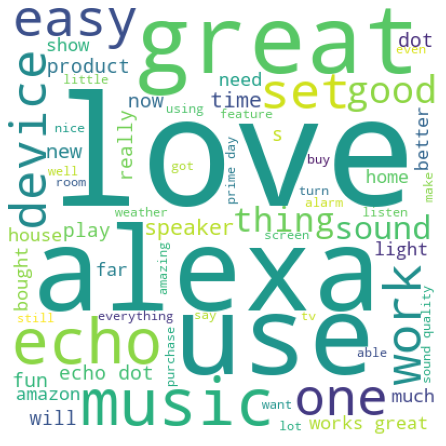

In [ ]:
# wordcloud of positive reviews
import matplotlib.pyplot as plt
corpus = ""
for review in dataset[dataset["feedback"]==1]["verified_reviews"]:
  tokens = review.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  corpus += " " + " ".join(tokens) + " "
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corpus)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

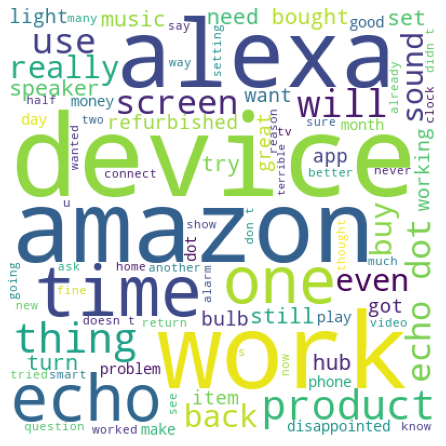

In [ ]:
# wordcloud of negative reviews
corpus = ""
for review in dataset[dataset["feedback"]==0]["verified_reviews"]:
  tokens = review.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  corpus += " " + " ".join(tokens) + " "
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corpus)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#Data CLeaning

In [ ]:
dataset['verified_reviews'] = dataset['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
def remove_punc(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [ ]:
dataset["verified_reviews"] = dataset["verified_reviews"].apply(remove_punc)

In [ ]:
dataset

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love Echo,1
1,5,31-Jul-18,Charcoal Fabric,Loved it,1
2,4,31-Jul-18,Walnut Finish,Sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,I lot fun thing My 4 yr old learns dinosaurs c...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,Perfect kids adults everyone between,1
3146,5,30-Jul-18,Black Dot,Listening music searching locations checking t...,1
3147,5,30-Jul-18,Black Dot,I love things running entire home TV lights th...,1
3148,5,30-Jul-18,White Dot,Only complaint I sound quality great I mostly ...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(stop_words="english",max_features=25)
vectors = cv.fit_transform(dataset["verified_reviews"]).toarray()

In [ ]:
cv.get_feature_names()

['alexa',
 'amazon',
 'better',
 'bought',
 'device',
 'dot',
 'easy',
 'echo',
 'good',
 'great',
 'home',
 'like',
 'love',
 'music',
 'new',
 'play',
 'product',
 'really',
 'set',
 'smart',
 'sound',
 'speaker',
 'time',
 'use',
 'works']

In [ ]:
vectors[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [ ]:
target = dataset["feedback"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectors,target,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(2520, 25)

In [ ]:
X_test.shape

(630, 25)

In [ ]:
y_train.shape

(2520,)

In [ ]:
y_test.shape

(630,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  8  38]
 [  7 577]]
0.9285714285714286


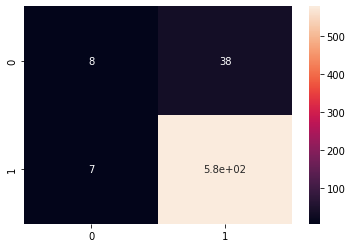

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(verbose=0,
#                      ignore_warnings=True,
#                      custom_metric=None,
#                      predictions=False,
#                      random_state=12,
#                      classifiers='all')

# models, predictions = clf.fit(X_train , X_test , y_train , y_test)

In [ ]:
# models

In [ ]:

from sklearn.ensemble import RandomForestClassifie
classfier1 = RandomForestClassifier(n_estimators=230 ,max_depth=30,random_state=22)
classfier1.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=230, random_state=22)

In [ ]:
y_pred2 = classfier1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[ 10  36]
 [  3 581]]
0.9380952380952381


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classfier2 = ExtraTreesClassifier(max_depth=19)
classfier2.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=19)

In [ ]:
y_pred3 = classfier2.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

[[  7  39]
 [  0 584]]
0.9380952380952381
